Importing the necessary libraries

In [ ]:
! pip install imbalanced-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm.notebook import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import mutual_info_classif


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras import layers
from keras import regularizers
from keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
raw_data = pd.read_csv("/content/gdrive/MyDrive/CS767/Project/raw_data.csv")

In [ ]:
raw_data.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: >

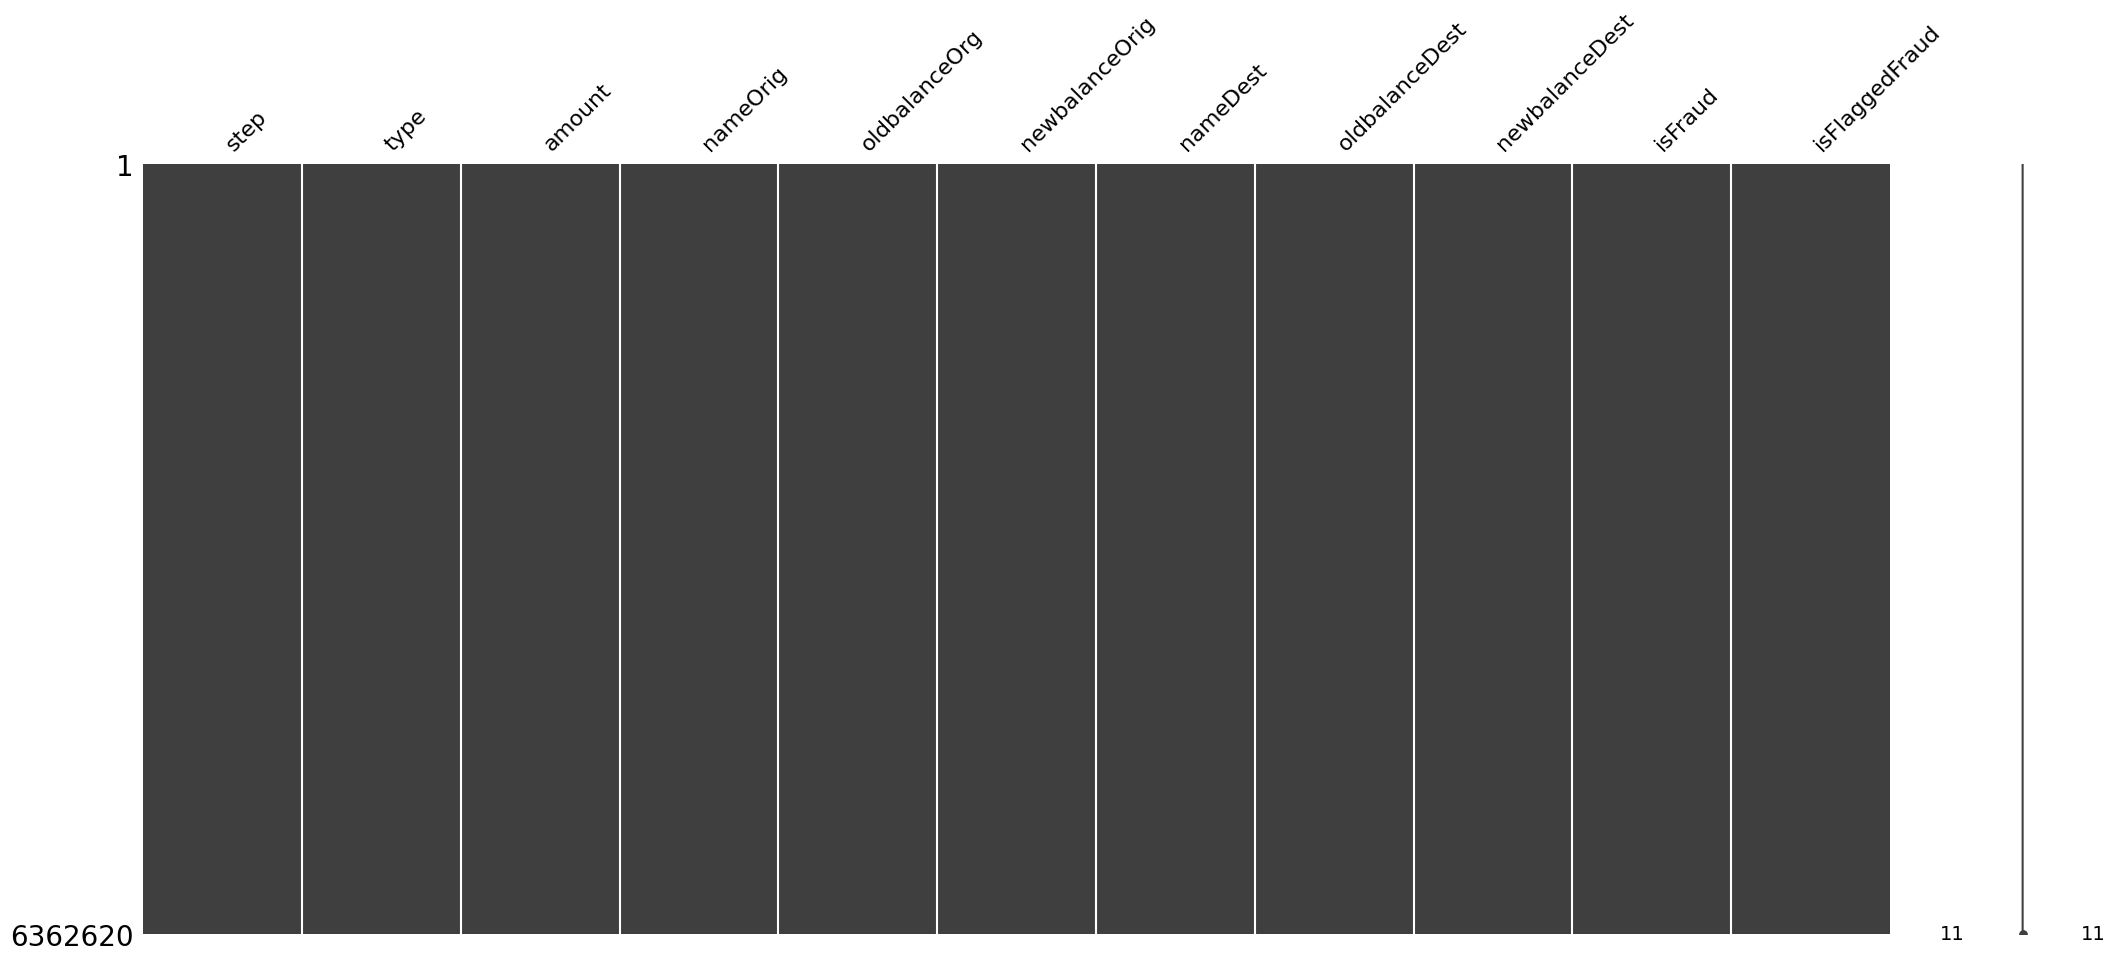

In [ ]:
#checking for missing values
msno.matrix(raw_data)

In [ ]:
cat_columns=['type', 'isFlaggedFraud']
num_columns=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

predictor=['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
           'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
target=['isFraud']

0    6354407
1       8213
Name: isFraud, dtype: int64


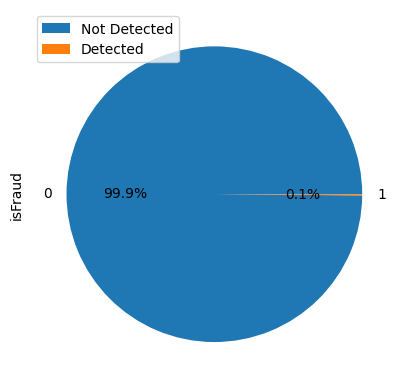

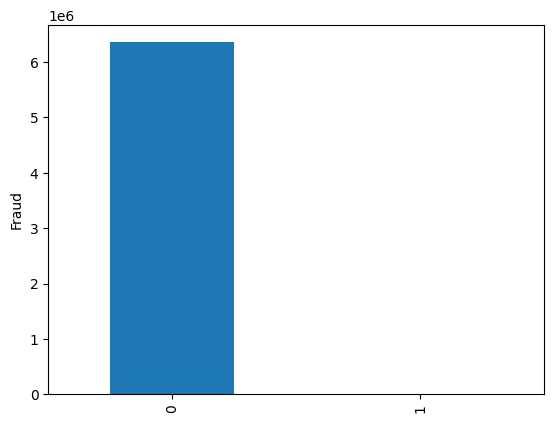

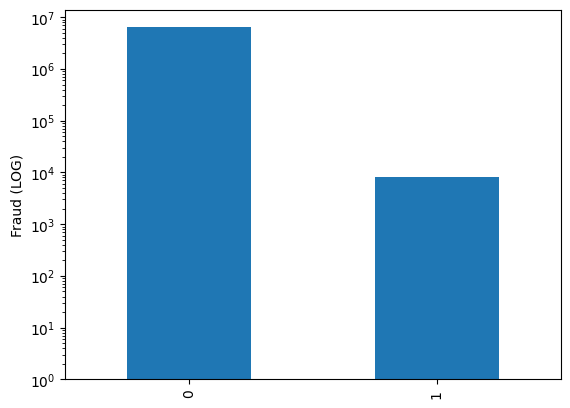

In [ ]:
#Checking for class imbalence in target feature
fraud_count = raw_data["isFraud"].value_counts()
print(fraud_count)

fraud_count.plot(kind='pie', y='isFraud', autopct='%1.1f%%')
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()
ax = fraud_count.T.plot(kind='bar', ylabel='Fraud', log=False)
plt.show()
ax = fraud_count.T.plot(kind='bar', ylabel='Fraud (LOG)', log=True)
plt.show()

As we can see above, non fraud transactions happen much more than fraud ones; This can mess with our training as it causes class imbalance and the minority class patterns get ignored. We will need to make sure to get equal amounts of training data for both cases so that our model does not overfit on the fraud cases.

In [ ]:
sampling_strategy={0: fraud_count[1], 1: fraud_count[1]}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)

x_res, y_res = rus.fit_resample(raw_data[predictor], raw_data[target])
x_res['isFraud']=y_res
raw_data = x_res

0    8213
1    8213
Name: isFraud, dtype: int64


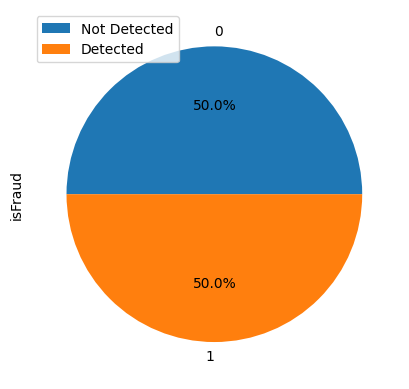

In [ ]:
fraud_count = raw_data["isFraud"].value_counts()
print(fraud_count)

fraud_count.plot(kind='pie', y='isFraud', autopct='%1.1f%%')
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

In [ ]:
#Train Test split
x_train, x_test, y_train, y_test = train_test_split(raw_data[predictor],raw_data[target],
                                                   random_state=100,
                                                   test_size=0.2,
                                                   shuffle=True)

print("Number of values in training set:", len(x_train.index))
print("Number of values in testing set:", len(x_test.index))

Number of values in training set: 13140
Number of values in testing set: 3286


In [ ]:
#reset index
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Numerical Data Exploration

In [ ]:
#Creating pivot table
num_table = pd.pivot_table(raw_data, index='isFraud', values=num_columns)

#changing order of columns
num_table = num_table[num_columns]

#Show data
num_table

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,
0,1.689169e+05,8.378477e+05,860510.015164,1.090097e+06,1.207076e+06
1,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06


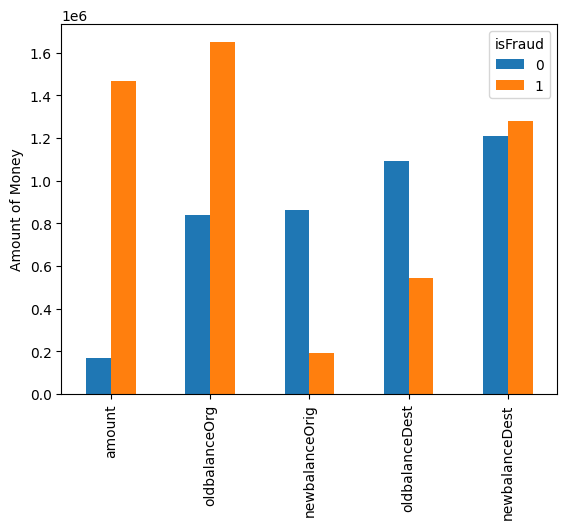

In [ ]:
ax = num_table[num_columns].T.plot(kind='bar', ylabel='Amount of Money')

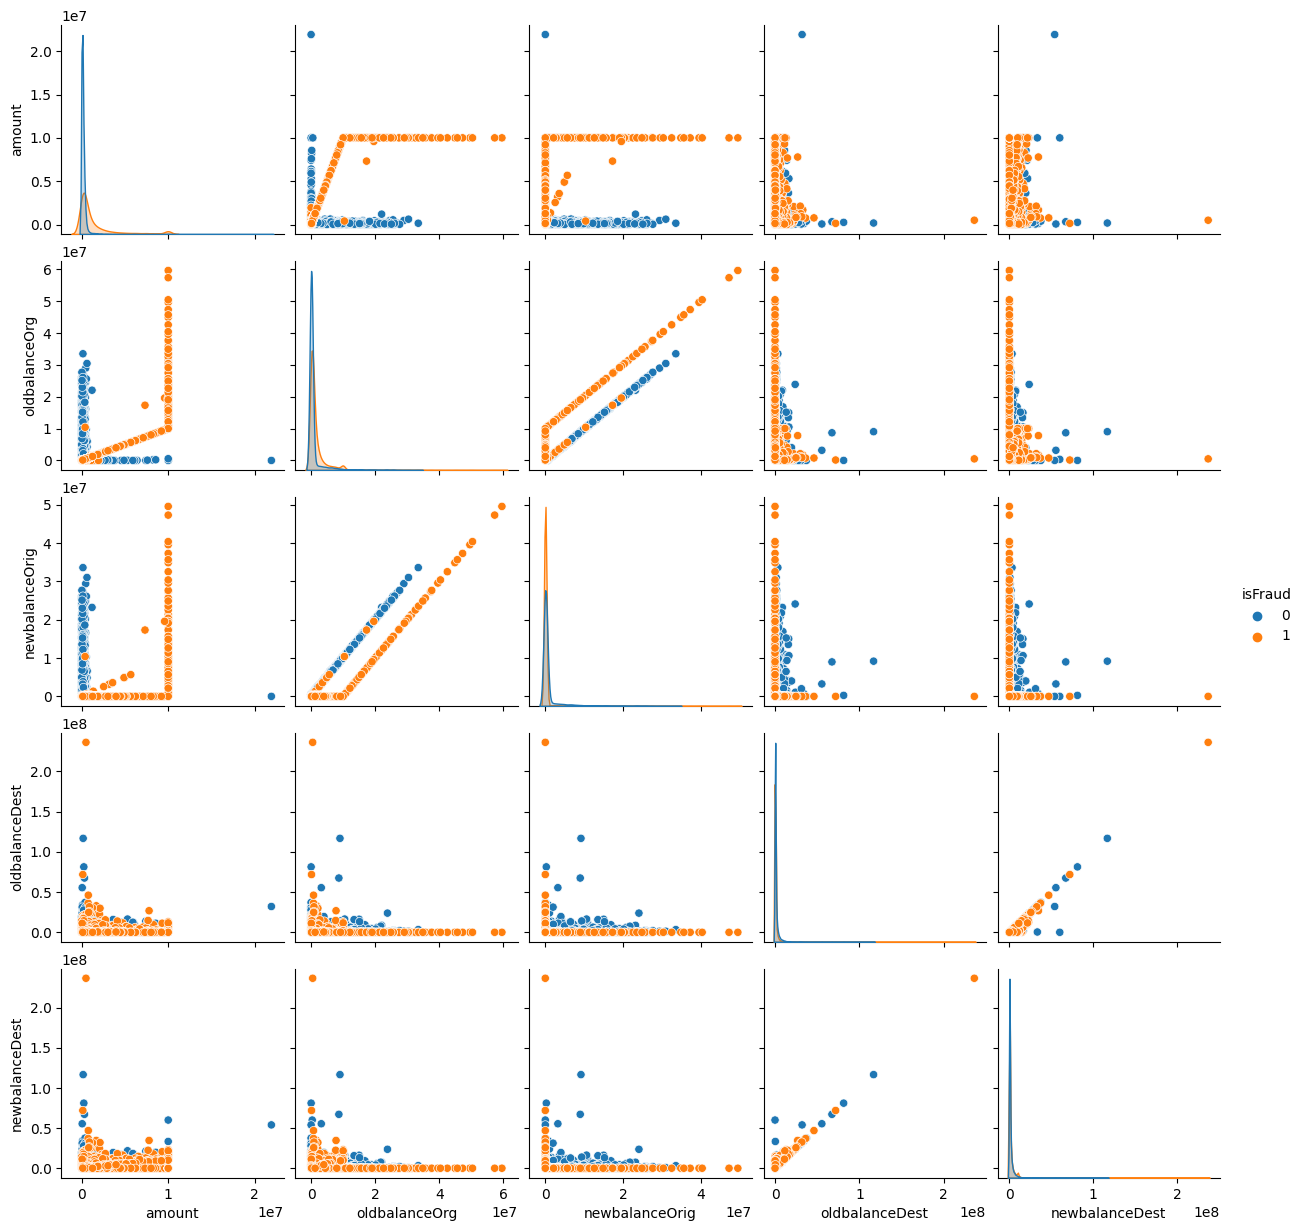

In [ ]:
sns.pairplot((raw_data[num_columns+['isFraud']]), hue="isFraud")

## Categorical Data Exploration

In [ ]:
type_table = pd.pivot_table(raw_data,
                            index = 'isFraud',
                            columns = 'type',
                            values = 'step',
                            aggfunc ='count')

print(type_table,'\n\n')

flag_table = pd.pivot_table(raw_data,
                            index = 'isFraud',
                            columns = 'isFlaggedFraud',
                            values = 'step',
                            aggfunc ='count')

print(flag_table,'\n\n')


type     CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
isFraud                                             
0         1820.0    2860.0   45.0   2852.0     636.0
1            NaN    4116.0    NaN      NaN    4097.0 


isFlaggedFraud       0     1
isFraud                     
0               8213.0   NaN
1               8197.0  16.0 




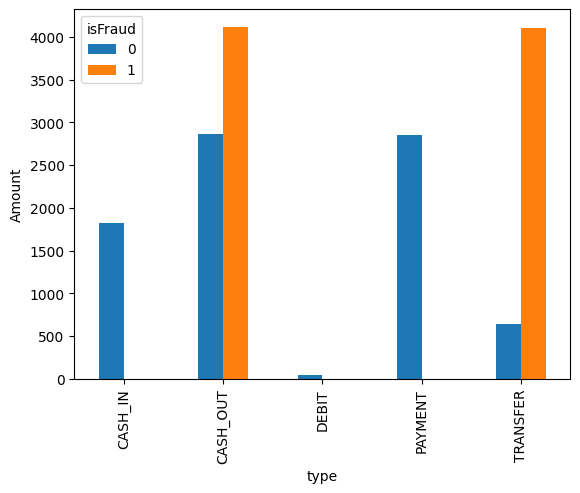

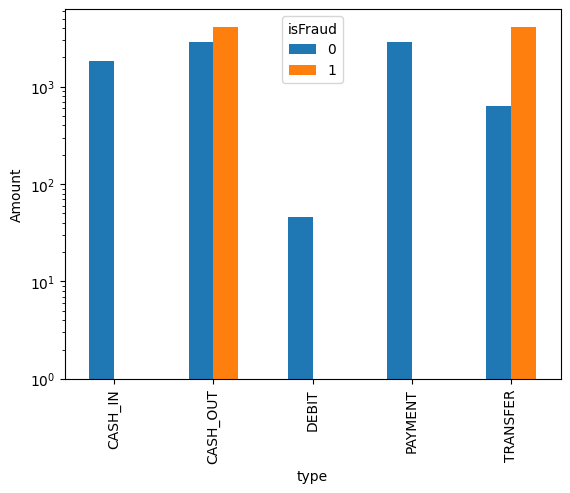

In [ ]:
#Graph for type of transaction

ax = type_table.T.plot(kind='bar', ylabel='Amount', log=False)

ax = type_table.T.plot(kind='bar', ylabel='Amount', log=True)

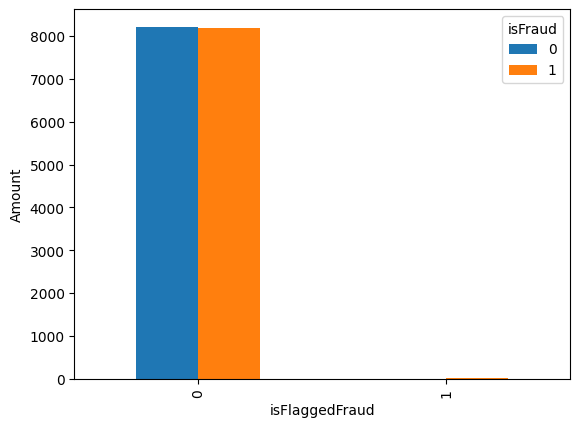

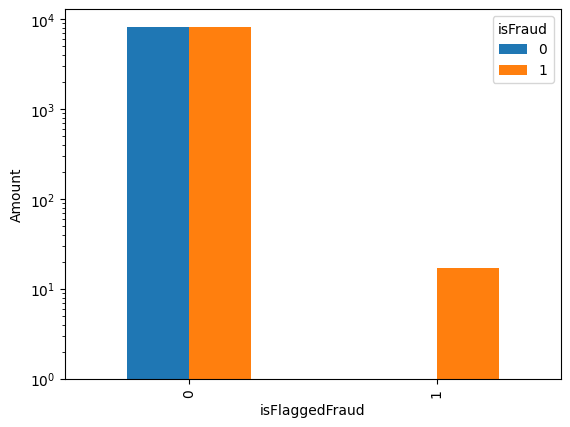

In [ ]:
#Graph for flaged fraud or not

ax = flag_table.T.plot(kind='bar', ylabel='Amount', log=False)

ax = flag_table.T.plot(kind='bar', ylabel='Amount', log=True)

<Axes: >

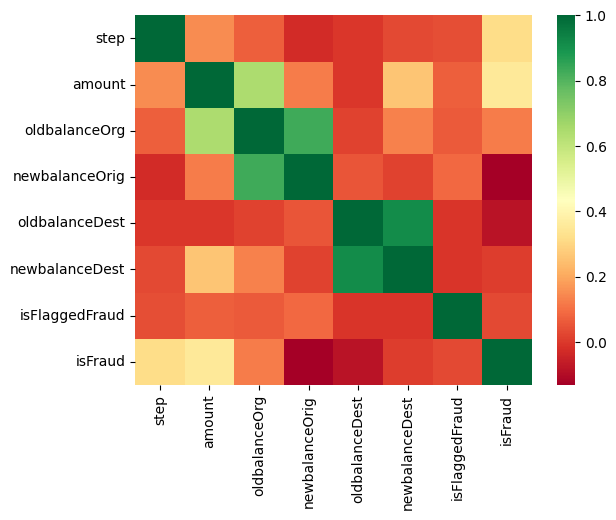

In [ ]:
sns.heatmap(raw_data.corr(numeric_only='False'),cmap='RdYlGn')

### In this step we discovered:

no missing values were mentioned as NaN but there are infact missing details in account balences. Thus they are not reliable
'amount' in fraud casses is much higher than non fraud casses.
'oldbalanceOrg' in fraud casses is much higher, indecating those who are targeted are genrally those with a lot of money.
'newbalanceOrig' in fraud casses are much less in fraud casses.
'newbalanceDest' in fraud casses is very less, indecating the person who does have much money in account is more likely to steal.
Fraud only seems to happen in transactions that are of type "CASH_OUT" and "TRANSFER"

## Feature Engineering

Posible new features:

*   Amount catogories

*   turn 'step' into a 24 hour format (asuming fraud is more likely to happen at certen times of the day)

*   customer type can be found out from the customer name



## Define helper Transformer functions

These helper functions will be later used for feature engineering.

In [ ]:
#Helper Transformers

#To impude a column
class columnImpudeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,column:str, strategy:str):
        self.column=column
        self.strategy=strategy

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X[self.column] = X[self.column].fillna(X[self.column].mean())
        return X


#To impude a column
class KNN_ColumnImpudeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns:str):
        self.columns=columns
        self.imputer = KNNImputer(n_neighbors=1)

    def fit(self, X, y=None):
        self.KNN_trained_model = self.imputer.fit(X[self.columns])

        return self

    def transform(self, X, y=None):
        data = self.KNN_trained_model.transform(X[self.columns])

        col = self.columns

        for i in range(len(col)):
            X[col[i]] = data[:, i]

        return X



In [ ]:
#To devide column (Fair)
class columnBinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,column:str, new_name:str, bin_count:int):
        self.column=column #Column to cut/devide
        self.new_name=new_name #name for the new column
        self.bin_count=bin_count #number of bins

    def fit(self, X, y=None):
        #getting bins
        ser, self.bins = pd.qcut(X[self.column], self.bin_count, retbins=True)
        return self

    def transform(self,X,y=None):
        current_bin = self.bins.copy()

        new_min= X[self.column].min()
        new_max= X[self.column].max()
        old_min = self.bins[0]
        old_max = self.bins[-1]

        current_bin[0] = new_min if new_min < old_min else old_min
        current_bin[-1] = new_max if new_max > old_max else old_max

        X[self.new_name] = pd.cut(X[self.column], bins=current_bin, include_lowest=True)
        return X

In [ ]:
#To encode columns
class columnLabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,column):
        self.column=column

    def label_encoder(self,df,col):
        """
        Encodes catagorical values to numaric.
        Leaves NaN values as it is.

        df: Dataframe to use
        col: Column to encode

        Return: New dataframe with encoded values replacing the old columns.
        """
        label_encoder = LabelEncoder()

        series_stack = pd.DataFrame(df[col]).stack()#.astype(str)

        df[col] = pd.Series(label_encoder.fit_transform(series_stack),
                                           index=series_stack.index
                                           ).unstack()
        #df[col] = df[col].astype('Int16')
        return df

    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        return self.label_encoder(X, self.column)


#To drop columns
class columnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)


#To replace columns
class columnReplacementTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,to_replace, replacement):
        self.to_replace=to_replace
        self.replacement=replacement

    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        X[self.to_replace]=X[self.replacement]
        X = X.drop(self.replacement,axis=1)
        return X

#To check if columns has data or not
class checkNaN_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self,check_column:str, new_column:str):
        self.check_column=check_column
        self.new_column=new_column

    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        X[self.new_column] = X[self.check_column].apply(lambda x: 0 if pd.isna(x) else 1)
        return X




In [ ]:
#To encode the columns
class columnEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def col_encode(self, df, cat):
        """
        splits an encoded column into seprate ones
        """
        cat_variables = df[cat].astype(str)
        cat_dummies = pd.get_dummies(cat_variables, drop_first=True)

        df = df.drop(cat, axis=1)
        df = pd.concat([df, cat_dummies], axis=1)

        return df

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.col_encode(X, self.columns)

In [ ]:
#To scale values
class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns
        self.scale = StandardScaler()

    def fit(self, X, y=None):
        self.scale.fit(X[self.columns])
        return self

    def transform(self,X,y=None):
        X[self.columns] = self.scale.transform(X[self.columns])
        return X

### New Features using Amount Column : Dividing into amount categories

In [ ]:
# Mapping Amount into diffrent ranges using a transformer
AmountBinTransform = columnBinTransformer("amount", "CategoricalAmount", 20)

x_train = AmountBinTransform.fit_transform(x_train)
x_test = AmountBinTransform.transform(x_test)

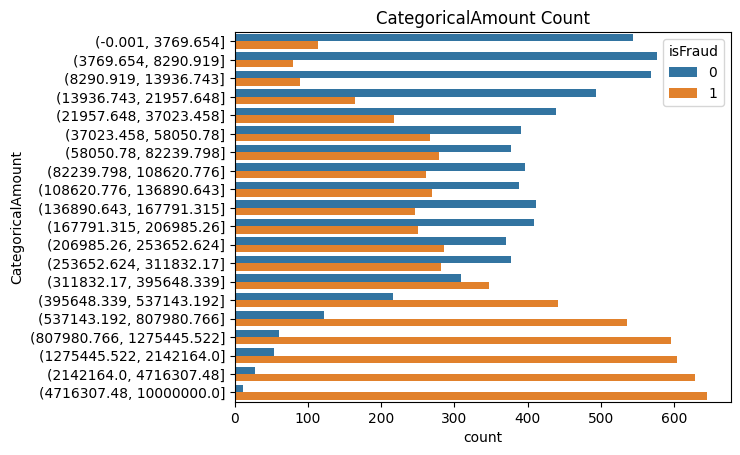

In [ ]:
sns.countplot(y = 'CategoricalAmount',
              data = pd.concat([x_train, y_train], axis=1),
              hue = 'isFraud',
              log=False).set_title("CategoricalAmount Count")
plt.show()

### New Features using step Column : changing into hours of day

In [ ]:
#We create a transformer to convert step to hours of the day

class hourTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,step_column, new_column):
        self.step_column=step_column
        self.new_column=new_column

    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        X[self.new_column]=X[self.step_column].apply(lambda val: val%24)
        return X

hourTransform = hourTransformer("step", "hour")

In [ ]:
x_train=hourTransform.transform(x_train)
x_test=hourTransform.transform(x_test)


In [ ]:
hour_table = pd.pivot_table(pd.concat([x_train, y_train], axis=1),
                            index = 'isFraud',
                            columns = 'hour',
                            values = 'nameOrig',
                            aggfunc ='count')

hour_table


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
isFraud,,,,,,,,,,,,,,,,,,,,,
0,73.0,31.0,6.0,NaN,1.0,NaN,2.0,9.0,32.0,298.0,...,426.0,432.0,482.0,457.0,581.0,663.0,618.0,259.0,180.0,128.0
1,238.0,287.0,298.0,253.0,220.0,300.0,284.0,264.0,298.0,283.0,...,285.0,259.0,287.0,281.0,277.0,264.0,273.0,269.0,288.0,262.0


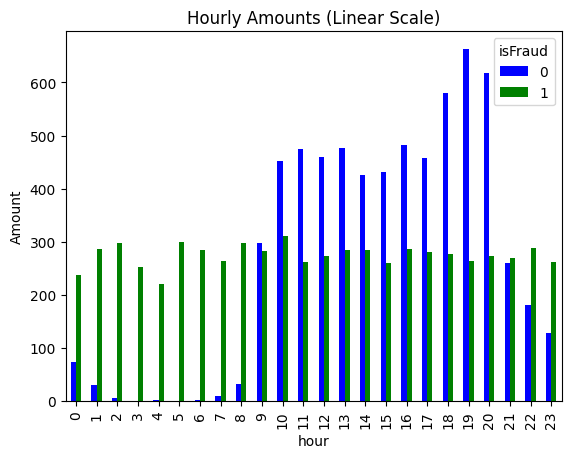

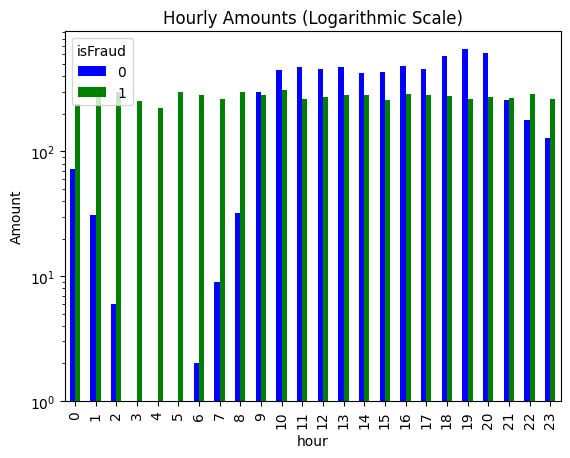

In [ ]:
# Plotting a bar chart with linear scale and different colors
ax = hour_table.T.plot(kind='bar', ylabel='Amount', log=False, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Hourly Amounts (Linear Scale)')
plt.show()

# Plotting a bar chart with logarithmic scale and different colors
ax = hour_table.T.plot(kind='bar', ylabel='Amount', log=True, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Hourly Amounts (Logarithmic Scale)')
plt.show()

 It would seem that while amount of fraud per hour is about the same, almost no genuine transactions happen during certain hours of the day

In [ ]:
#Creating a transformer to define if a transaction is between:
# 0)Customer to Customer
# 1)Customer to Merchant
# 2)Merchant to Customer
# 3)Merchant to Merchant


class transactionTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, new_column):
        self.new_column=new_column

    def fit(self, X, y=None):
        return self

    def transform(self,X,y=None):
        new_data=[]
        encoding = {('C','C'):0,
                    ('C','M'):1,
                    ('M','C'):2,
                    ('M','M'):3}

        for i in X.index:
            new_data.append( encoding[(X['nameOrig'][i][0], X['nameDest'][i][0])] )

        X[self.new_column] = new_data
        return X

transactionTypeTransform = transactionTypeTransformer("transaction_type")

In [ ]:
x_train = transactionTypeTransform.transform(x_train)
x_test = transactionTypeTransform.transform(x_test)

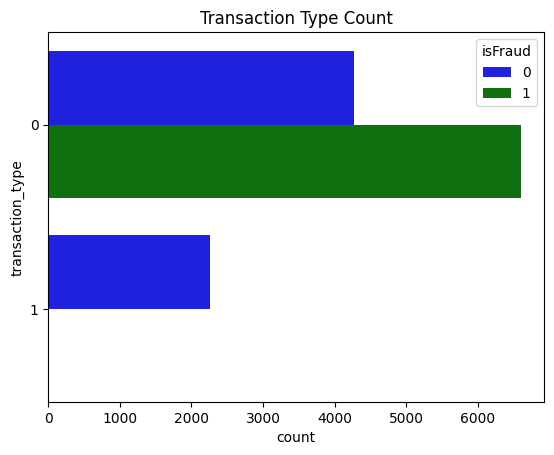

In [ ]:
# Set a custom color palette
custom_palette = {0: 'blue', 1: 'green'}

# Plotting the countplot
sns.countplot(
    y='transaction_type',
    data=pd.concat([x_train, y_train], axis=1),
    hue='isFraud',
    palette=custom_palette,
    log=False
).set_title("Transaction Type Count")

plt.show()

In [ ]:
x_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,CategoricalAmount,hour,transaction_type
0,86,CASH_OUT,6972164.97,C1268472825,6972164.97,0.00,C2126149202,5680.28,6977845.25,0,"(4716307.48, 10000000.0]",14,0
1,741,CASH_OUT,10000000.00,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,0,"(4716307.48, 10000000.0]",21,0
2,715,CASH_OUT,1390048.67,C1067753985,1390048.67,0.00,C1479628852,167999.27,1558047.94,0,"(1275445.522, 2142164.0]",19,0
3,187,TRANSFER,44164.00,C1644806560,44164.00,0.00,C1111727092,0.00,0.00,0,"(37023.458, 58050.78]",19,0
4,331,PAYMENT,21413.40,C1807958796,24327.66,2914.27,M1894148208,0.00,0.00,0,"(13936.743, 21957.648]",19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13135,493,TRANSFER,1214511.61,C1579869749,1214511.61,0.00,C1291615113,0.00,0.00,0,"(807980.766, 1275445.522]",13,0
13136,14,PAYMENT,9350.94,C879005367,261.00,0.00,M103869541,0.00,0.00,0,"(8290.919, 13936.743]",14,1
13137,546,CASH_OUT,105097.16,C1066191297,105097.16,0.00,C1432077169,1965333.76,2070430.91,0,"(82239.798, 108620.776]",18,0
13138,150,CASH_OUT,3178915.22,C424434408,3178915.22,0.00,C524837856,690831.94,3869747.17,0,"(2142164.0, 4716307.48]",6,0


## Further Data Pre-processing

In [ ]:
to_drop = ['step', 'type', 'amount','nameOrig', 'oldbalanceOrg',
           'newbalanceOrig', 'nameDest', 'oldbalanceDest',
           'newbalanceDest']

dropColumnsTransform = columnDropperTransformer(to_drop)

x_train = dropColumnsTransform.fit_transform(x_train)
x_test = dropColumnsTransform.fit_transform(x_test)

In [ ]:
#encoding catogorical Amount
CategoricalAmountLabelEncoderTransform = columnLabelEncoderTransformer("CategoricalAmount")

x_train = CategoricalAmountLabelEncoderTransform.transform(x_train)
x_test = CategoricalAmountLabelEncoderTransform.transform(x_test)

In [ ]:
ScalerTransform = ScalerTransformer(['isFlaggedFraud', 'CategoricalAmount', 'hour', 'transaction_type'])

#save this data so that if we remove features then we can rescale.
x_train_unscaled = x_train.copy()
x_test_unscaled = x_test.copy()

#Then scale the data
x_train = ScalerTransform.fit_transform(x_train)
x_test = ScalerTransform.transform(x_test)


In [ ]:
x_train

,isFlaggedFraud,CategoricalAmount,hour,transaction_type
0,-0.033806,1.647639,0.095732,-0.456129
1,-0.033806,1.647639,1.255717,-0.456129
2,-0.033806,1.300782,0.924292,-0.456129
3,-0.033806,-0.780363,0.924292,-0.456129
4,-0.033806,-1.127221,0.924292,2.192362
...,...,...,...,...
13135,-0.033806,1.127353,-0.069980,-0.456129
13136,-0.033806,-1.300650,0.095732,2.192362
13137,-0.033806,-0.433506,0.758580,-0.456129
13138,-0.033806,1.474210,-1.229964,-0.456129


In [ ]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalAmount    0.167947
transaction_type     0.137375
hour                 0.131707
isFlaggedFraud       0.003349
dtype: float64

<Axes: >

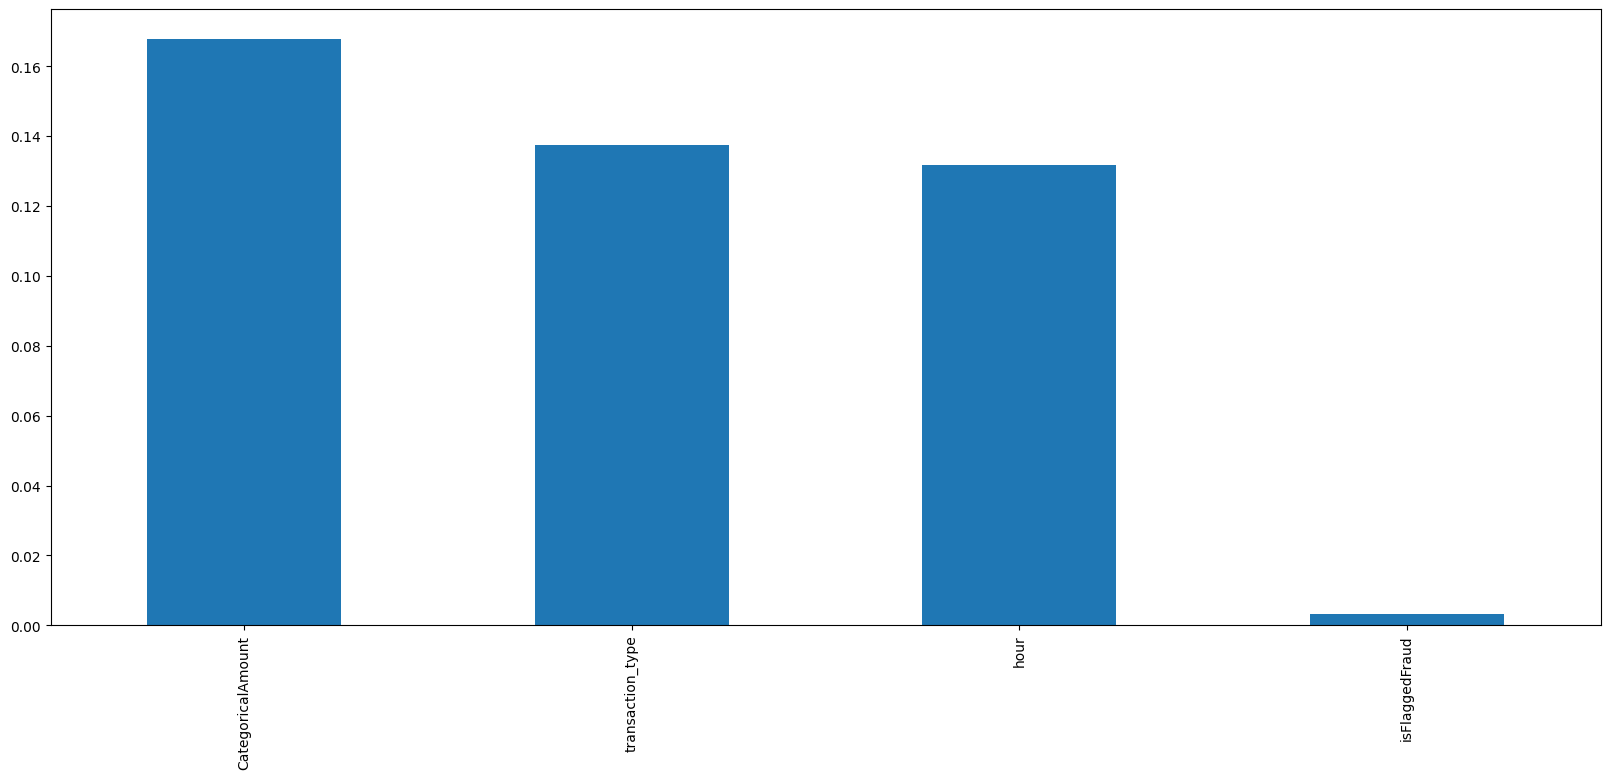

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#Selecting best 3 features

sel_five_cols = SelectKBest(mutual_info_classif, k=3)
sel_five_cols.fit(x_train, y_train)

best_features = set(x_train.columns[sel_five_cols.get_support()])
remove_features = set(x_train.columns).difference(best_features)

print("Features to keep:",best_features)
print("Features to remove:",remove_features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features to keep: {'hour', 'transaction_type', 'CategoricalAmount'}
Features to remove: {'isFlaggedFraud'}


In [ ]:
x_test_unscaled

,isFlaggedFraud,CategoricalAmount,hour,transaction_type
0,0,10,15,0
1,0,8,18,0
2,0,15,7,0
3,0,1,13,1
4,0,3,12,1
...,...,...,...,...
3281,0,9,9,0
3282,0,9,18,0
3283,0,16,4,0
3284,0,11,9,0


In [ ]:
#Now we rescale the data for the selected features

ScalerTransform = ScalerTransformer(list(best_features))

#Then we scale the data
x_train = ScalerTransform.fit_transform(x_train_unscaled)
x_test = ScalerTransform.transform(x_test_unscaled)

x_train

,isFlaggedFraud,CategoricalAmount,hour,transaction_type
0,0,1.647639,0.095732,-0.456129
1,0,1.647639,1.255717,-0.456129
2,0,1.300782,0.924292,-0.456129
3,0,-0.780363,0.924292,-0.456129
4,0,-1.127221,0.924292,2.192362
...,...,...,...,...
13135,0,1.127353,-0.069980,-0.456129
13136,0,-1.300650,0.095732,2.192362
13137,0,-0.433506,0.758580,-0.456129
13138,0,1.474210,-1.229964,-0.456129


In [ ]:
#Dropping columns

to_drop = list(remove_features)
x_train.drop(labels= to_drop, axis=1, inplace=True)
x_test.drop(labels= to_drop, axis=1, inplace=True)

x_test.head()

,CategoricalAmount,hour,transaction_type
0,0.086780,0.261444,-0.456129
1,-0.260077,0.758580,-0.456129
2,0.953924,-1.064252,-0.456129
3,-1.474078,-0.069980,2.192362
4,-1.127221,-0.235692,2.192362


In [ ]:
print("Number of values used for training:", len(x_train.index))

Number of values used for training: 13140


In [ ]:
#Performing SMOTE + Edited Nearest Neighbor on data to Enhance data quality and deal with any data imbalences

#smoteENN = SMOTEENN()

#x_train, y_train = smoteENN.fit_resample(x_train, y_train)

In [ ]:
print("Number of values used for training:", len(x_train.index))

Number of values used for training: 13140


## Training and Validation
We will first train functional neural network data model on the data. Then, we will train and validate using Sequential Neural Network and also check whether performance increases or not using ensemble of sequential Neural Network model.


1. Using Functional API of keras Tensorflow


§	The code defines a neural network model for binary classification with four hidden layers, each followed by a dropout layer for regularization. 
§	The output layer uses a sigmoid activation function, and the model is compiled with binary cross-entropy loss and the Adam optimizer. 

Explanation of model – 

•	feature_amount = len(x_train.columns): This line calculates the number of features in your training data and assigns it to the variable feature_amount.

•	input = Input(shape=(feature_amount,)): This line defines the input layer of your neural network. It specifies that the input will have a shape of (feature_amount,), meaning it will take input with the same number of features as your training data.

•	Hidden Layers:

o	lay1 = layers.Dense(8, input_shape=(feature_amount,), activation='relu')(input): This line creates the first hidden layer with 8 neurons, using the ReLU activation function. The input_shape is specified only in the first layer. Subsequent layers infer the input shape from the previous layer's output.

o	drop1 = layers.Dropout(0.2)(lay1): This line adds a dropout layer with a dropout rate of 0.2 after the first hidden layer. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to zero during training.

o	Similar layers (lay2, drop2, lay3, drop3, lay4) are created, each with 8 neurons, ReLU activation, and a dropout layer after the hidden layer.

•	out = layers.Dense(units=1, activation='sigmoid', name='dense_output')(lay4): This line creates the output layer with a single neuron (since it's a binary classification task), using the sigmoid activation function.

•	NN_model = Model(inputs=input, outputs=out): This line defines the neural network model by specifying the input and output layers.

•	NN_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']): This line compiles the model, specifying the loss function (binary crossentropy for binary classification), the optimizer (Adam), and the metric to monitor during training (accuracy).

•	NN_model.summary(): This line prints a summary of the model, displaying information about the architecture, the number of parameters, and the connections between layers.

•	plot_model(NN_model): This line visualizes the neural network architecture and saves the plot to a file or displays it, depending on your environment.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_38 (Dense)            (None, 8)                 32        
                                                                 
 dropout_24 (Dropout)        (None, 8)                 0         
                                                                 
 dense_39 (Dense)            (None, 8)                 72        
                                                                 
 dropout_25 (Dropout)        (None, 8)                 0         
                                                                 
 dense_40 (Dense)            (None, 8)                 72        
                                                                 
 dropout_26 (Dropout)        (None, 8)                 0   

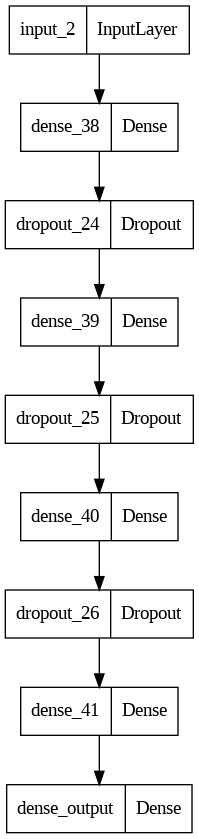

In [ ]:
feature_amount = len(x_train.columns)

# input layer
input = Input(shape=(feature_amount,))


#Hidden layers
lay1 = layers.Dense(8, input_shape=(feature_amount,), activation='relu')(input)

drop1 = layers.Dropout(0.2)(lay1)

lay2 = layers.Dense(8, activation='relu')(drop1)

drop2 = layers.Dropout(0.2)(lay2)

lay3 = layers.Dense(8, activation='relu')(drop2)

drop3 = layers.Dropout(0.2)(lay3)

lay4 = layers.Dense(8, activation='relu')(drop3)

#Output layer
out = layers.Dense(units = 1, activation='sigmoid', name='dense_output')(lay4)

NN_model = Model(inputs=input, outputs=out)

NN_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

NN_model.summary()

plot_model(NN_model)

Explanation of below code – 

ModelCheckpoint Callback:

•	ModelCheckpoint is a Keras callback that is used to save the model's weights during training. It helps in monitoring a specified metric, saving the best weights based on that metric, and preventing overfitting by storing the weights of the best-performing model.
•	In this case, the ModelCheckpoint callback is named checkpoint.
•	It is configured with the following parameters:
o	"best_model.hdf5": This is the filename for saving the best model weights in the HDF5 format. The weights will be saved to this file if there is an improvement in the monitored metric.
o	monitor='val_loss': The metric to monitor for saving the best model. In this case, it's the validation loss.
o	verbose=1: Verbosity mode. It specifies how much information about the training progress should be printed during training. Here, it's set to 1, which means it will print information about the saved model.
o	save_best_only=True: If set to True, the callback will only save the best model weights based on the monitored metric (validation loss, in this case).
o	save_freq='epoch': Specifies how often to save the model. Here, it's set to 'epoch', meaning the model will be saved at the end of each epoch if it achieves an improvement in the monitored metric.

•	Training the Model:

o	The NN_model.fit() method is used to train the neural network model (NN_model) on the training data.
o	x_train and y_train are the input features and labels for training, respectively.
o	batch_size=64: The number of samples per gradient update. The model weights are updated after processing each batch of 64 samples.
o	epochs=150: The number of epochs or passes through the entire training dataset.
o	validation_split=0.3: Specifies that 30% of the training data will be used as a validation set. The model's performance on this set is monitored during training.
o	callbacks=[checkpoint]: The ModelCheckpoint callback is passed as a callback during training. This ensures that the model weights are saved according to the specified conditions.



In [ ]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_freq='epoch')

history = NN_model.fit(x_train,
                       y_train,
                       batch_size =64,
                       epochs=150,
                       validation_split=0.3,
                       callbacks=[checkpoint])

Epoch 1/150
143/144 [============================>.] - ETA: 0s - loss: 0.6483 - accuracy: 0.6304
Epoch 1: val_loss improved from inf to 0.58071, saving model to best_model.hdf5
144/144 [==============================] - 3s 7ms/step - loss: 0.6479 - accuracy: 0.6304 - val_loss: 0.5807 - val_accuracy: 0.7438
Epoch 2/150
 36/144 [======>.......................] - ETA: 0s - loss: 0.5963 - accuracy: 0.6862

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


140/144 [============================>.] - ETA: 0s - loss: 0.5616 - accuracy: 0.7157
Epoch 2: val_loss improved from 0.58071 to 0.49334, saving model to best_model.hdf5
144/144 [==============================] - 1s 6ms/step - loss: 0.5614 - accuracy: 0.7158 - val_loss: 0.4933 - val_accuracy: 0.7577
Epoch 3/150
138/144 [===========================>..] - ETA: 0s - loss: 0.5275 - accuracy: 0.7236
Epoch 3: val_loss improved from 0.49334 to 0.46638, saving model to best_model.hdf5
144/144 [==============================] - 1s 6ms/step - loss: 0.5263 - accuracy: 0.7240 - val_loss: 0.4664 - val_accuracy: 0.7651
Epoch 4/150
137/144 [===========================>..] - ETA: 0s - loss: 0.4969 - accuracy: 0.7371
Epoch 4: val_loss improved from 0.46638 to 0.44342, saving model to best_model.hdf5
144/144 [==============================] - 1s 6ms/step - loss: 0.4956 - accuracy: 0.7377 - val_loss: 0.4434 - val_accuracy: 0.7763
Epoch 5/150
142/144 [============================>.] - ETA: 0s - loss: 0.475

best val accuracy: 0.8069508075714111


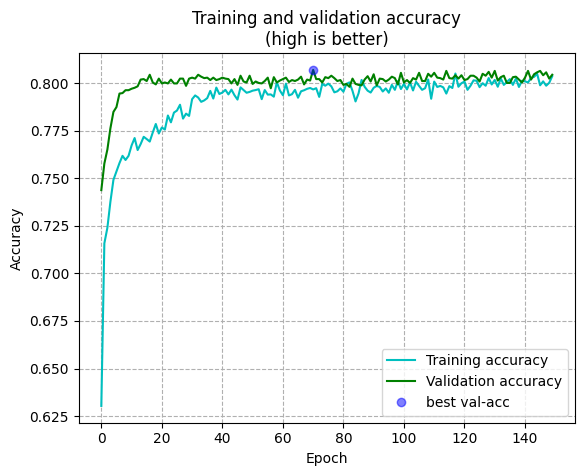

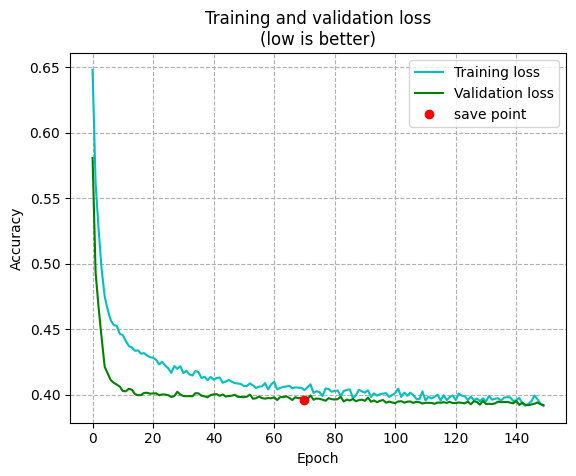

In [ ]:
#plotting model training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

#saved = checkpoint.saved_epoch[-1]
best = val_accuracy.index(max(val_accuracy))


print("best val accuracy:",max(val_accuracy))

plt.plot(epochs, accuracy, 'c', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
#plt.plot([epochs[saved]], [val_accuracy[saved]], 'ro', label='save point', alpha = 0.5)
plt.plot([epochs[best]], [val_accuracy[best]], 'bo', label='best val-acc', alpha = 0.5)
plt.title('Training and validation accuracy\n(high is better)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle = '--')
plt.show()

plt.plot(epochs, loss, 'c', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot([epochs[best]], [val_loss[best]], 'ro', label='save point')
plt.title('Training and validation loss\n(low is better)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle = '--')
plt.show()

Below code will select the best model at particular epoch.
Then, this model will be used to predict values for x_test dataset. Then the predicted values are checked for accuracy and confusion matrix is plotted.

Confusion Matrix:
cm = confusion_matrix(y_test, y_pred): The confusion matrix is calculated using the true labels (y_test) and the predicted labels (y_pred).
The confusion matrix provides information about the model's performance in terms of true positives, true negatives, false positives, and false negatives.


In [ ]:
#getting the best model
NN_model_best = load_model('best_model.hdf5')

103/103 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.817711503347535


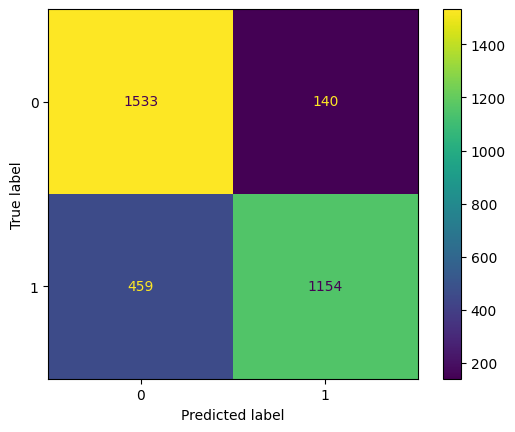

In [ ]:
NN_result = NN_model_best.predict(x_test)
y_pred = (NN_result > 0.5).astype(int).ravel()

accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy}")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Sequential Model

§	Sequential model supports linear stacks of layers.
§	this code defines a neural network for binary classification using the Sequential API. 
§	It consists of four hidden layers with ReLU activation, dropout layers for regularization, and an output layer with a sigmoid activation function. 

Detail Explanation:
•	Sequential Model: The Sequential model is used to linearly stack layers.
•	Import Statements: Import necessary modules from Keras, including Sequential, Dense, and Dropout.

•	Sequential Model Initialization: Create an instance of the Sequential model. This model allows you to linearly stack layers.

•	Dense Layers (Hidden Layers):

o	The first Dense layer has 8 neurons, ReLU activation, and an input shape defined by input_shape=(feature_amount,). This layer represents the first hidden layer and is connected to the input layer.
o	After each Dense layer, a Dropout layer is added with a dropout rate of 0.2. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.
o	The pattern is repeated for the second, third, and fourth hidden layers.
•	Output Layer:

o	The final Dense layer represents the output layer with 1 neuron and a sigmoid activation function. This configuration is suitable for binary classification tasks.
•	Compilation:

o	The model is compiled using the compile method. The chosen loss function is binary crossentropy, suitable for binary classification. The Adam optimizer is used for optimization, and the metric to monitor during training is accuracy.
•	Summary:

o	The model.summary() method is called to display a summary of the model architecture. This summary provides information about the type and shape of each layer, as well as the total number of parameters in the model.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(8, input_shape=(feature_amount,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid', name='dense_output'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 8)                 32        
                                                                 
 dropout_27 (Dropout)        (None, 8)                 0         
                                                                 
 dense_43 (Dense)            (None, 8)                 72        
                                                                 
 dropout_28 (Dropout)        (None, 8)                 0         
                                                                 
 dense_44 (Dense)            (None, 8)                 72        
                                                                 
 dropout_29 (Dropout)        (None, 8)                 0         
                                                                 
 dense_45 (Dense)            (None, 8)                

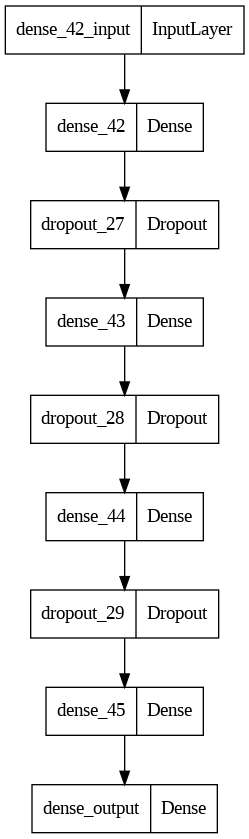

In [ ]:
plot_model(model)

Below code explanation:

•	ModelCheckpoint Callback:

o	ModelCheckpoint is a Keras callback used to save the model's weights during training.
o	In this case, it's named checkpoint_seq.
o	It is configured with the following parameters:
	"best_modelseq.hdf5": This is the filename for saving the best model weights in the HDF5 format. The weights will be saved to this file if there is an improvement in the monitored metric.
	monitor='val_loss': The metric to monitor for saving the best model. Here, it's the validation loss.
	verbose=1: Verbosity mode. It specifies how much information about the training progress should be printed during training. Here, it's set to 1, which means it will print information about the saved model.
	save_best_only=True: If set to True, the callback will only save the best model weights based on the monitored metric (validation loss, in this case).
	save_freq='epoch': Specifies how often to save the model. Here, it's set to 'epoch', meaning the model will be saved at the end of each epoch if it achieves an improvement in the monitored metric.
•	Training the Model:

o	The model.fit() method is used to train the neural network model (model) on the training data.
o	x_train and y_train are the input features and labels for training, respectively.
o	batch_size=64: The number of samples per gradient update. The model weights are updated after processing each batch of 64 samples.
o	epochs=150: The number of epochs or passes through the entire training dataset.
o	validation_split=0.3: Specifies that 30% of the training data will be used as a validation set. The model's performance on this set is monitored during training.
o	callbacks=[checkpoint_seq]: The ModelCheckpoint callback is passed as a callback during training. This ensures that the model weights are saved according to the specified conditions.
•	Training History:

o	The training history (history_seq) contains information about the training and validation metrics at each epoch. It can be used for later analysis and visualization of the model's performance.


In [ ]:
checkpoint_seq = ModelCheckpoint("best_modelseq.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_freq='epoch')

history_seq = model.fit(x_train,
                        y_train,
                        batch_size=64,
                        epochs=150,
                        validation_split=0.3,
                        callbacks=[checkpoint_seq])


Epoch 1/150
138/144 [===========================>..] - ETA: 0s - loss: 0.6070 - accuracy: 0.6687
Epoch 1: val_loss improved from inf to 0.55082, saving model to best_modelseq.hdf5
144/144 [==============================] - 3s 11ms/step - loss: 0.6063 - accuracy: 0.6695 - val_loss: 0.5508 - val_accuracy: 0.7405
Epoch 2/150
 38/144 [======>.......................] - ETA: 0s - loss: 0.5652 - accuracy: 0.7179

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/144 [===========================>..] - ETA: 0s - loss: 0.5505 - accuracy: 0.7263
Epoch 2: val_loss improved from 0.55082 to 0.50189, saving model to best_modelseq.hdf5
144/144 [==============================] - 1s 5ms/step - loss: 0.5500 - accuracy: 0.7244 - val_loss: 0.5019 - val_accuracy: 0.7519
Epoch 3/150
135/144 [===========================>..] - ETA: 0s - loss: 0.5200 - accuracy: 0.7331
Epoch 3: val_loss improved from 0.50189 to 0.47934, saving model to best_modelseq.hdf5
144/144 [==============================] - 1s 6ms/step - loss: 0.5181 - accuracy: 0.7354 - val_loss: 0.4793 - val_accuracy: 0.7476
Epoch 4/150
143/144 [============================>.] - ETA: 0s - loss: 0.4934 - accuracy: 0.7409
Epoch 4: val_loss improved from 0.47934 to 0.45467, saving model to best_modelseq.hdf5
144/144 [==============================] - 1s 6ms/step - loss: 0.4931 - accuracy: 0.7411 - val_loss: 0.4547 - val_accuracy: 0.7692
Epoch 5/150
135/144 [===========================>..] - ETA: 0s - lo

best val accuracy: 0.8044139742851257


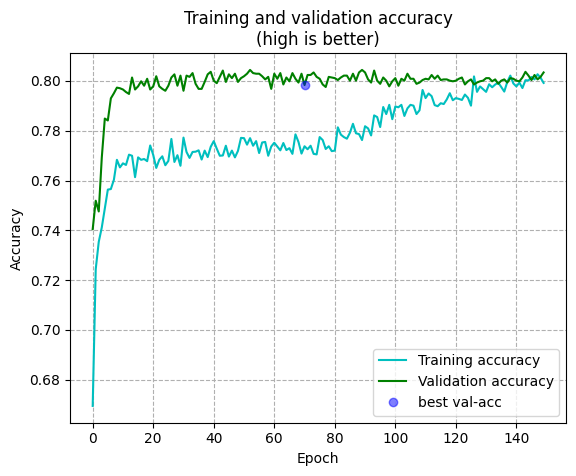

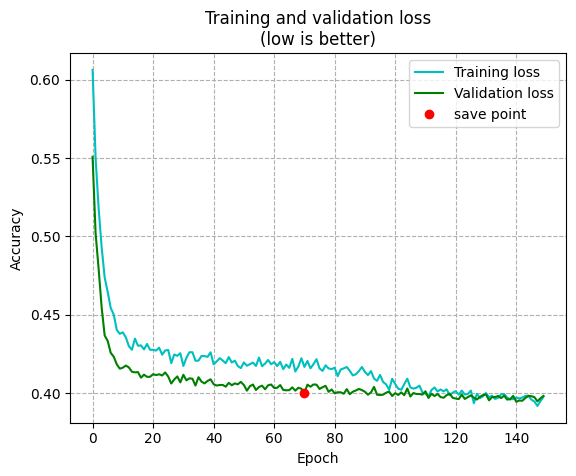

In [ ]:
#plotting model training history
accuracy_seq = history_seq.history['accuracy']
val_accuracyseq = history_seq.history['val_accuracy']
loss_seq = history_seq.history['loss']
val_lossseq = history_seq.history['val_loss']
epochs_seq = range(len(accuracy_seq))

#saved = checkpoint.saved_epoch[-1]
best_seq = val_accuracyseq.index(max(val_accuracyseq))

print("best val accuracy:",max(val_accuracyseq))

plt.plot(epochs_seq, accuracy_seq, 'c', label='Training accuracy')
plt.plot(epochs_seq, val_accuracyseq, 'g', label='Validation accuracy')
#plt.plot([epochs[saved]], [val_accuracy[saved]], 'ro', label='save point', alpha = 0.5)
plt.plot([epochs_seq[best]], [val_accuracyseq[best]], 'bo', label='best val-acc', alpha = 0.5)
plt.title('Training and validation accuracy\n(high is better)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle = '--')
plt.show()

plt.plot(epochs_seq, loss_seq, 'c', label='Training loss')
plt.plot(epochs_seq, val_lossseq, 'g', label='Validation loss')
plt.plot([epochs_seq[best]], [val_lossseq[best]], 'ro', label='save point')
plt.title('Training and validation loss\n(low is better)')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle = '--')
plt.show()

Below code will select the best model at particular epoch.
Then, this model will be used to predict values for x_test dataset. Then the predicted values are checked for accuracy and confusion matrix is plotted.

Confusion Matrix:
cm = confusion_matrix(y_test, y_pred): The confusion matrix is calculated using the true labels (y_test) and the predicted labels (y_pred).
The confusion matrix provides information about the model's performance in terms of true positives, true negatives, false positives, and false negatives.


In [ ]:
#getting the best model
NN_model_best1 = load_model('best_modelseq.hdf5')

103/103 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.8149726110772977


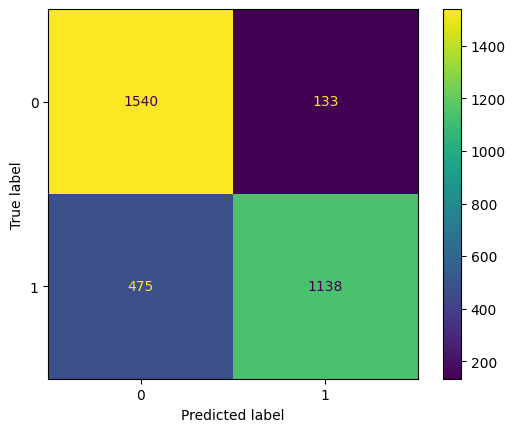

In [ ]:
NN_result1 = NN_model_best1.predict(x_test)
y_pred = (NN_result1 > 0.5).astype(int).ravel()

accuracy1 = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy1}")

# Create the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot()
plt.show()

## Using Ensemble Learning

Ensemble learning involves combining predictions from multiple models to achieve better performance.

§	The provided code creates an ensemble of neural network models for binary classification. The number of models in the ensemble is set to 3 (num_models = 3).
1.	Initialization: Two empty lists (models and history_enseq_list) are initialized to store individual models and their training histories, respectively.
2.	Model Training Loop: The code iterates num_models times, each time splitting the training data into training and validation sets using different random seeds.
3.	The ModelCheckpoint callback is used to save the weights of the best-performing model based on validation loss during training.
4.	Training and Saving:
1.	Each model is trained on its respective split of the data for 150 epochs with a batch size of 64.
2.	The weights of the best-performing model are loaded back into the model after training.
§	After the loop completes, the models list contains three trained neural network models, and history_enseq_list contains their corresponding training histories. This ensemble of models provides diversity in training data splits and initialization conditions, contributing to potentially improved generalization performance.

Ensemble Configuration:

•	num_models = 3: Specifies the number of models in the ensemble.
•	Lists Initialization:
o	models = []: Initializes an empty list to store individual models.
o	history_enseq_list = []: Initializes an empty list to store training histories for each model.
•	Model Training Loop:
o	The code iterates num_models times, training and saving a separate model for each iteration.
o	train_test_split is used to split the training data into training and validation sets for each model, with a different random seed (random_state=i) for each iteration.
•	Model Architecture:
o	A simple Sequential neural network is created for each model with four hidden layers and a binary classification output layer.
•	Model Compilation:
o	Each model is compiled with binary crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric.
•	ModelCheckpoint Callback:
o	ModelCheckpoint is used to save the model weights with the lowest validation loss during training. This is done for each model separately.
•	Model Training:
o	The model is trained using the training data with batch size 64 and for 150 epochs. The validation data is used to monitor the model's performance on unseen data.
•	Load Best Weights:
o	After training, the weights of the best-performing model (based on validation loss) are loaded back into the model.
•	List Updates:
o	The trained model and its training history are appended to the models and history_enseq_list lists, respectively.


In [ ]:


# Number of models in the ensemble
num_models = 3

# List to store individual models
models = []
history_enseq_list = []
# Train and save each model
for i in range(num_models):
    x_train_model, x_val_model, y_train_model, y_val_model = train_test_split(x_train, y_train, test_size=0.2, random_state=i)

    model_enseq = Sequential()
    model_enseq.add(Dense(8, input_shape=(feature_amount,), activation='relu'))
    model_enseq.add(Dropout(0.2))
    model_enseq.add(Dense(8, activation='relu'))
    model_enseq.add(Dropout(0.2))
    model_enseq.add(Dense(8, activation='relu'))
    model_enseq.add(Dropout(0.2))
    model_enseq.add(Dense(8, activation='relu'))
    model_enseq.add(Dense(units=1, activation='sigmoid'))

    model_enseq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Assuming you have the 'checkpoint' variable defined
    checkpoint_enseq = ModelCheckpoint(f"best_model_{i}.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_freq='epoch')

    history_enseq = model_enseq.fit(x_train_model, y_train_model, batch_size=64, epochs=150, validation_data=(x_val_model, y_val_model), callbacks=[checkpoint_enseq])

    # Load the best weights into the model
    model_enseq.load_weights(f"best_model_{i}.hdf5")

    models.append(model_enseq)
    history_enseq_list.append(history_enseq)




Epoch 1/150
165/165 [==============================] - ETA: 0s - loss: 0.6249 - accuracy: 0.6534
Epoch 1: val_loss improved from inf to 0.52748, saving model to best_model_0.hdf5
165/165 [==============================] - 3s 9ms/step - loss: 0.6249 - accuracy: 0.6534 - val_loss: 0.5275 - val_accuracy: 0.7412
Epoch 2/150
 18/165 [==>...........................] - ETA: 0s - loss: 0.5533 - accuracy: 0.6944

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/165 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7014
Epoch 2: val_loss improved from 0.52748 to 0.48397, saving model to best_model_0.hdf5
165/165 [==============================] - 1s 7ms/step - loss: 0.5347 - accuracy: 0.7014 - val_loss: 0.4840 - val_accuracy: 0.7447
Epoch 3/150
161/165 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.7132
Epoch 3: val_loss improved from 0.48397 to 0.47218, saving model to best_model_0.hdf5
165/165 [==============================] - 1s 8ms/step - loss: 0.5093 - accuracy: 0.7133 - val_loss: 0.4722 - val_accuracy: 0.7424
Epoch 4/150
154/165 [===========================>..] - ETA: 0s - loss: 0.4981 - accuracy: 0.7250
Epoch 4: val_loss improved from 0.47218 to 0.46504, saving model to best_model_0.hdf5
165/165 [==============================] - 1s 6ms/step - loss: 0.4989 - accuracy: 0.7246 - val_loss: 0.4650 - val_accuracy: 0.7538
Epoch 5/150
165/165 [==============================] - ETA: 0s - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/165 [============================>.] - ETA: 0s - loss: 0.5751 - accuracy: 0.7260
Epoch 2: val_loss improved from 0.56693 to 0.51676, saving model to best_model_1.hdf5
165/165 [==============================] - 1s 8ms/step - loss: 0.5746 - accuracy: 0.7266 - val_loss: 0.5168 - val_accuracy: 0.7698
Epoch 3/150
157/165 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7513
Epoch 3: val_loss improved from 0.51676 to 0.47670, saving model to best_model_1.hdf5
165/165 [==============================] - 1s 6ms/step - loss: 0.5301 - accuracy: 0.7528 - val_loss: 0.4767 - val_accuracy: 0.7865
Epoch 4/150
165/165 [==============================] - ETA: 0s - loss: 0.5170 - accuracy: 0.7587
Epoch 4: val_loss improved from 0.47670 to 0.46306, saving model to best_model_1.hdf5
165/165 [==============================] - 1s 6ms/step - loss: 0.5170 - accuracy: 0.7587 - val_loss: 0.4631 - val_accuracy: 0.7976
Epoch 5/150
165/165 [==============================] - ETA: 0s - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


159/165 [===========================>..] - ETA: 0s - loss: 0.5264 - accuracy: 0.7262
Epoch 2: val_loss improved from 0.53798 to 0.42433, saving model to best_model_2.hdf5
165/165 [==============================] - 1s 6ms/step - loss: 0.5266 - accuracy: 0.7252 - val_loss: 0.4243 - val_accuracy: 0.8010
Epoch 3/150
154/165 [===========================>..] - ETA: 0s - loss: 0.4837 - accuracy: 0.7534
Epoch 3: val_loss improved from 0.42433 to 0.40369, saving model to best_model_2.hdf5
165/165 [==============================] - 1s 6ms/step - loss: 0.4823 - accuracy: 0.7537 - val_loss: 0.4037 - val_accuracy: 0.8029
Epoch 4/150
162/165 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.7574
Epoch 4: val_loss improved from 0.40369 to 0.39743, saving model to best_model_2.hdf5
165/165 [==============================] - 1s 6ms/step - loss: 0.4697 - accuracy: 0.7577 - val_loss: 0.3974 - val_accuracy: 0.8086
Epoch 5/150
163/165 [============================>.] - ETA: 0s - loss:

Below code - Loop Over Ensemble Models:

•	for i, history_enseq in enumerate(history_enseq_list):: This loop iterates over each trained model's training history in the ensemble (history_enseq_list). The loop variable i represents the index of the model in the ensemble, and history_enseq represents its training history.
•	This loop is useful for visually inspecting and comparing the training and validation performance of each model in the ensemble over different epochs. It helps in understanding how well each model generalizes to unseen data and whether there are signs of overfitting or underfitting.


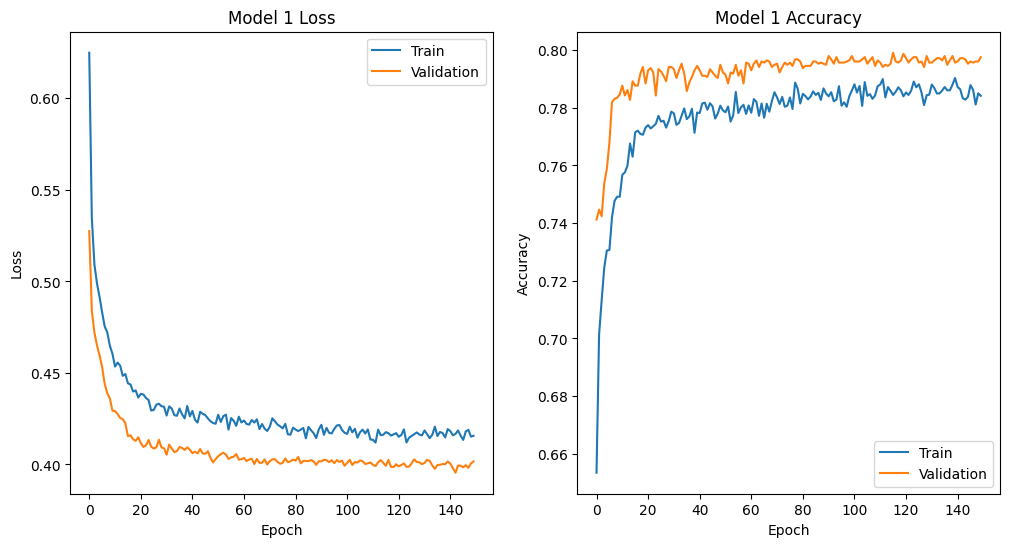

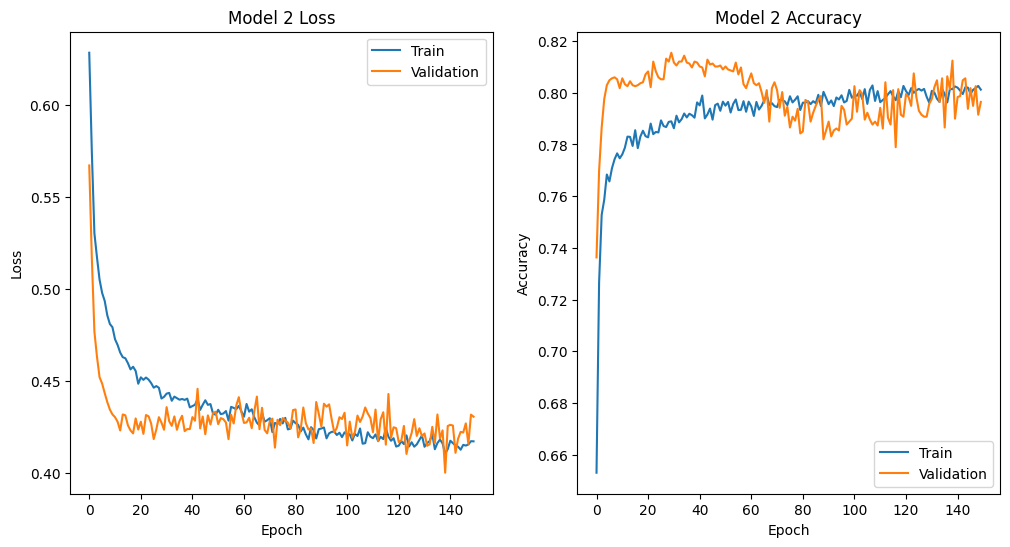

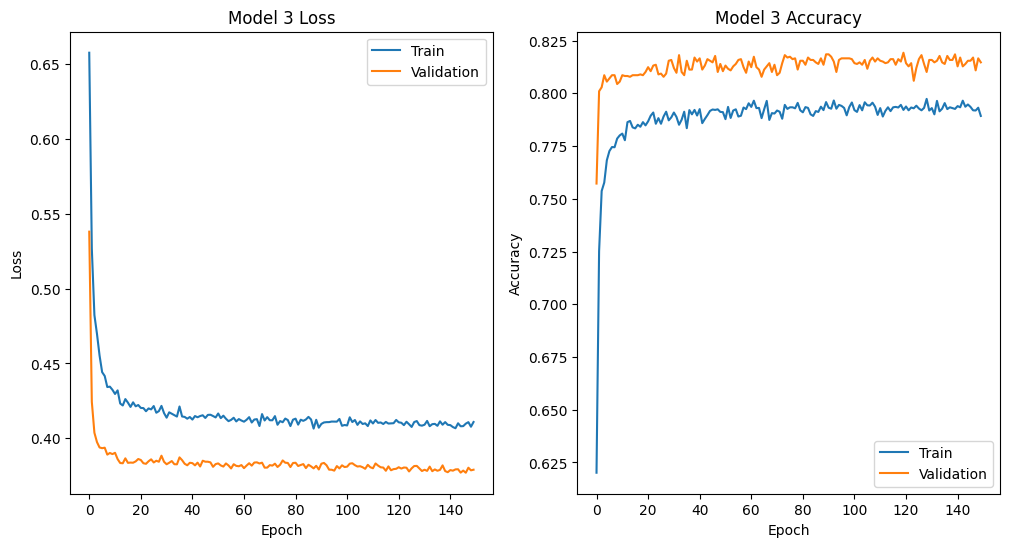

In [ ]:


for i, history_enseq in enumerate(history_enseq_list):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history_enseq.history['loss'])
    plt.plot(history_enseq.history['val_loss'])
    plt.title(f'Model {i+1} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history_enseq.history['accuracy'])
    plt.plot(history_enseq.history['val_accuracy'])
    plt.title(f'Model {i+1} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.show()


In [ ]:
import numpy as np

# Create an ensemble by averaging predictions
def ensemble_predict(models, x_data):
    predictions_ensemble = np.zeros_like(models[0].predict(x_data))
    for model in models:
        predictions_ensemble += model.predict(x_data)
    return predictions_ensemble / len(models)


# Make predictions using the ensemble on new data
ensemble_predictions = ensemble_predict(models, x_test)


103/103 [==============================] - 0s 2ms/step


Now, ensemble_predictions contains the averaged predictions of the ensemble on the new data. This ensemble approach is a simple way to combine the predictions of multiple models and potentially improve overall prediction accuracy by leveraging the diversity of individual models in the ensemble.

Below code allows you to assess the accuracy of the ensemble predictions and visually inspect the performance using a confusion matrix. The threshold can be adjusted based on the specific requirements of the binary classification problem.



Accuracy: 0.8159


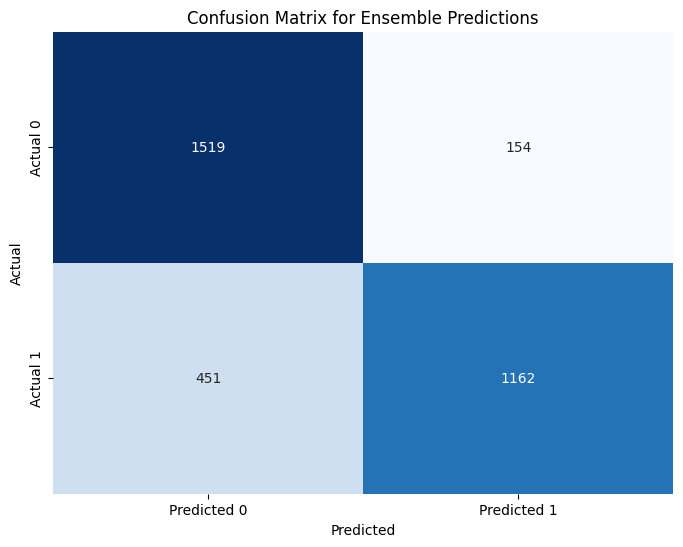

In [ ]:


# Choose a threshold for binary classification
threshold = 0.5  # You can adjust this threshold based on your preference
ensemble_predictions_binary = (ensemble_predictions > threshold).astype(int)
# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions_binary)
print(f'Accuracy: {accuracy_ensemble:.4f}')


# Convert ensemble predictions to binary (0 or 1) using the threshold
ensemble_predictions_binary = (ensemble_predictions > threshold).astype(int)

# Create the confusion matrix
cm_ensemble = confusion_matrix(y_test, ensemble_predictions_binary)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Ensemble Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### You can now use ensemble_predictions for evaluation or further analysis

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Round predictions to convert probabilities to class labels (binary classification)
ensemble_predictions_binary = np.round(ensemble_predictions)

# Calculate accuracy
accuracy_enseq = accuracy_score(y_test, ensemble_predictions_binary)
print(f'Ensemble Accuracy: {accuracy_enseq:.4f}')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, ensemble_predictions_binary))

# Confusion Matrix
conf_matrix_enseq = confusion_matrix(y_test, ensemble_predictions_binary)
print('Confusion Matrix:')
print(conf_matrix_enseq)


Ensemble Accuracy: 0.8159
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1673
           1       0.88      0.72      0.79      1613

    accuracy                           0.82      3286
   macro avg       0.83      0.81      0.81      3286
weighted avg       0.83      0.82      0.81      3286

Confusion Matrix:
[[1519  154]
 [ 451 1162]]


### Regression

In [ ]:
# Assuming you have ground truth labels for the test data (y_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error
mse_enseq = mean_squared_error(y_test, ensemble_predictions)
print(f'Mean Squared Error: {mse_enseq:.4f}')

# Calculate Mean Absolute Error
mae_enseq = mean_absolute_error(y_test, ensemble_predictions)
print(f'Mean Absolute Error: {mae_enseq:.4f}')


Mean Squared Error: 0.1264
Mean Absolute Error: 0.2718


In [ ]:
x_test

,CategoricalAmount,hour,transaction_type
0,0.086780,0.261444,-0.456129
1,-0.260077,0.758580,-0.456129
2,0.953924,-1.064252,-0.456129
3,-1.474078,-0.069980,2.192362
4,-1.127221,-0.235692,2.192362
...,...,...,...
3281,-0.086648,-0.732828,-0.456129
3282,-0.086648,0.758580,-0.456129
3283,1.127353,-1.561389,-0.456129
3284,0.260209,-0.732828,-0.456129


In [ ]:
print(type(x_test))
print(x_test.head())  # Assuming x_test is a Pandas DataFrame or Series


<class 'pandas.core.frame.DataFrame'>
   CategoricalAmount      hour  transaction_type
0           0.086780  0.261444         -0.456129
1          -0.260077  0.758580         -0.456129
2           0.953924 -1.064252         -0.456129
3          -1.474078 -0.069980          2.192362
4          -1.127221 -0.235692          2.192362


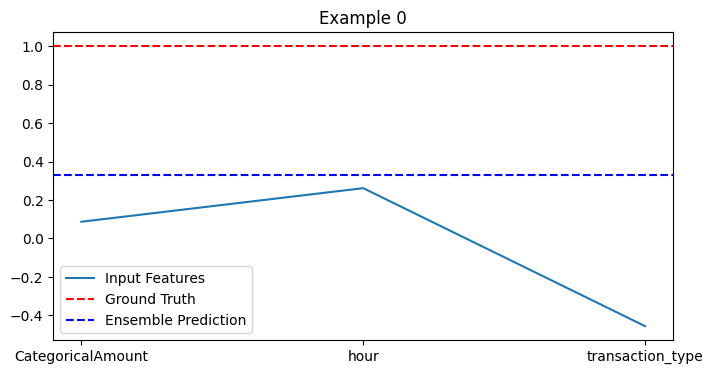

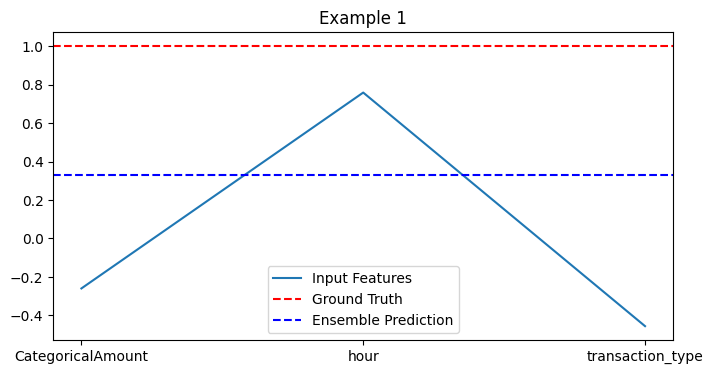

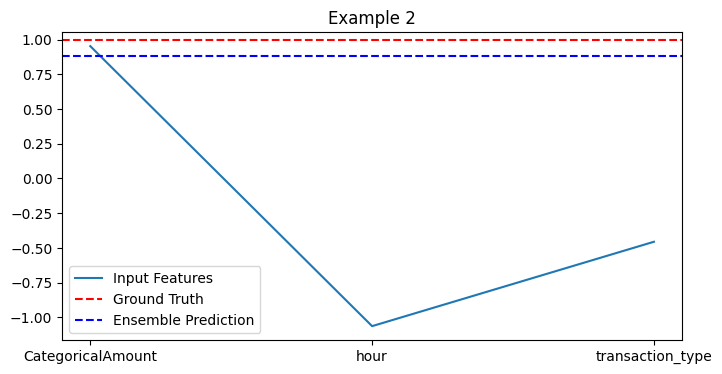

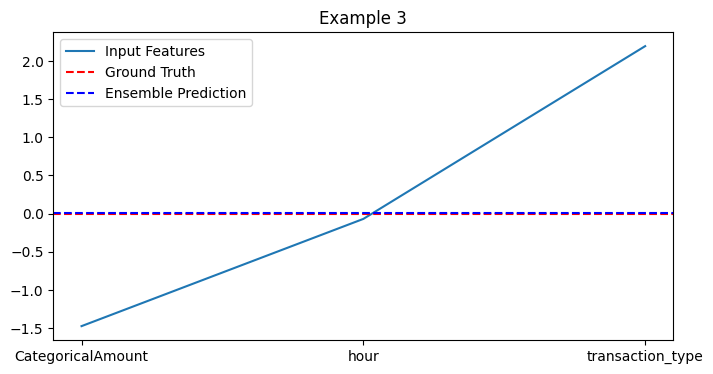

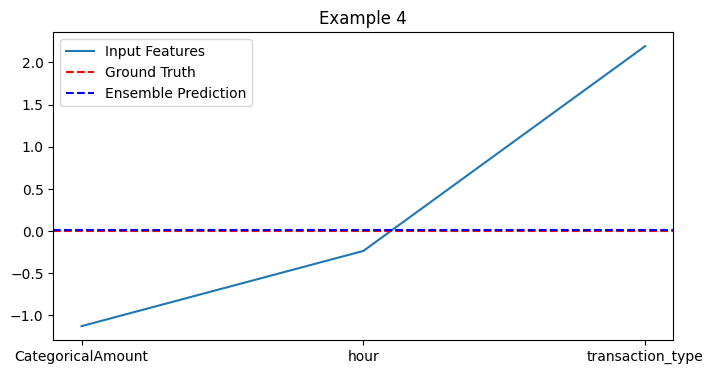

In [ ]:
sample_indices = [0, 1, 2, 3, 4]

for index in sample_indices:
    plt.figure(figsize=(8, 4))

    # Access columns by name
    input_features = x_test.iloc[index]  # Assuming you want to plot all features
    ground_truth = y_test.iloc[index].values  # Convert to NumPy array
    ensemble_prediction = ensemble_predictions[index]

    plt.plot(input_features, label='Input Features')
    plt.axhline(y=ground_truth, color='r', linestyle='--', label='Ground Truth')
    plt.axhline(y=ensemble_prediction, color='b', linestyle='--', label='Ensemble Prediction')

    plt.title(f'Example {index}')
    plt.legend()
    plt.show()




Input Features (Input Features line):

The blue line represents the values of the input features (CategoricalAmount, hour, transaction_type) for a specific example (index) from your test data.
Ground Truth (Ground Truth line in red dashed):

The red dashed line represents the ground truth value for the corresponding example (index). This is the actual target or label for the given input features.
Ensemble Prediction (Ensemble Prediction line in blue dashed):

The blue dashed line represents the prediction made by your ensemble model for the same example (index). This is the predicted value based on the ensemble of multiple models.
By visualizing the input features, ground truth, and ensemble prediction on the same plot, you can get an intuitive sense of how well your ensemble model is performing for these specific examples. If the blue dashed line (ensemble prediction) aligns well with the red dashed line (ground truth), it indicates that your ensemble model is making accurate predictions for these particular examples. If there are discrepancies, you may want to inspect and understand why the model predictions differ from the ground truth.